# Spam Detection

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset into a DataFrame

In [80]:
task = pd.read_csv('Task_1.csv')

In [81]:
task.head(10)

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Checking for missing values
### If it is NaN, it replaces it with an empty string ('')

In [83]:
new_task = task.where(pd.notnull(task), '')

In [84]:
new_task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  16716 non-null  object
 1   text    16716 non-null  object
dtypes: object(2)
memory usage: 261.3+ KB


In [85]:
new_task.head(10)

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Where lables is spam is converted into 0 and Where lables is ham is converted into 1

In [87]:
new_task.loc[new_task['labels'] == 'spam', 'labels'] = 0
new_task.loc[new_task['labels'] == 'ham', 'labels'] = 1

In [88]:
X = new_task['text']
Y = new_task['labels']

In [89]:
X

0        Go until jurong point, crazy.. Available only ...
1                            Ok lar... Joking wif u oni...
2        Free entry in 2 a wkly comp to win FA Cup fina...
3        U dun say so early hor... U c already then say...
4        Nah I don't think he goes to usf, he lives aro...
                               ...                        
16711    C'est la 2ème fois que nous avons essayé 2 con...
16712          Est-ce que ü b ira à l'esplanade en maison?
16713    Dommage, * était d'humeur pour ça. Donc... d'a...
16714    Le type a fait une saloperie mais j'ai agi com...
16715                           Rofl. C'est vrai à son nom
Name: text, Length: 16716, dtype: object

In [90]:
Y

0        1
1        1
2        0
3        1
4        1
        ..
16711    0
16712    1
16713    1
16714    1
16715    1
Name: labels, Length: 16716, dtype: object

In [91]:
from sklearn.model_selection import train_test_split

## Split data into 80% training and 20% testing sets, with a random seed of 5

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

## TfidfVectorizer is used to convert the text data into numerical representations for machine learning

In [96]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression()

## Trained a Logistic Regression model on the preprocessed data

In [100]:
model.fit(X_train_features, Y_train)

LogisticRegression()

## Model accuracy

In [102]:
from sklearn.metrics import accuracy_score

### Model accuracy of trained data

In [104]:
pridiction_on_trained_data = model.predict(X_train_features)
accuracy_on_trained_data = accuracy_score(Y_train, pridiction_on_trained_data)

In [105]:
print("Accuracy of trained data: ", accuracy_on_trained_data * 100, "%")

Accuracy of trained data:  98.19772659288064 %


### Model accuracy of tested data

In [107]:
pridiction_on_tested_data = model.predict(X_test_features)
accuracy_on_tested_data = accuracy_score(Y_test, pridiction_on_tested_data)

In [108]:
print("Accuracy of tested data: ", accuracy_on_tested_data * 100, "%")

Accuracy of tested data:  97.1291866028708 %


In [109]:
from sklearn.metrics import confusion_matrix

## Created a confusion matrix to visualize the model's performance on classifying Spam and Ham

In [111]:
cm = confusion_matrix(Y_test, pridiction_on_tested_data)

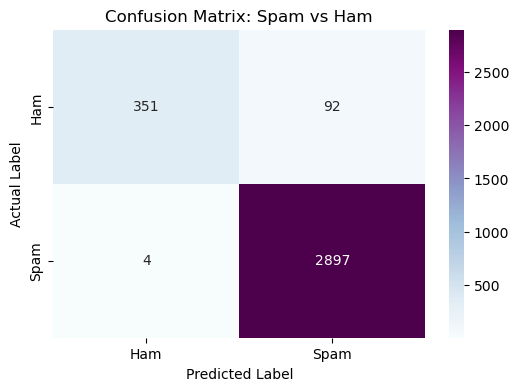

In [112]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Spam vs Ham')
plt.show()

### Calculating sensitivity and specifity oc confusion matrix

In [114]:
TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)


#### Sensitivity

In [116]:
print("Sensitivity:", sensitivity * 100)

Sensitivity: 99.86211651154774


#### Specificity

In [118]:
print("Specificity:", specificity * 100)

Specificity: 79.23250564334086


## Testing

In [120]:
message = input("Enter message to check if it is Spam or Ham:\n")

message_features = feature_extraction.transform([message])
prediction = model.predict(message_features)

print("\nSpam Message" if prediction[0] == 1 else "\nHam Message")
# EXAMPLE
# [Arcade Insider] September at The Arcade: New Challenges, New Cloud Skills, More Points, Bigger Wins!

Enter message to check if it is Spam or Ham:
 [Arcade Insider] September at The Arcade: New Challenges, New Cloud Skills, More Points, Bigger Wins!



Spam Message
